In [ ]:
!pip install opencv-python

In [ ]:
def hough_line(img):
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))  # max_dist
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
    y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos


def show_hough_line(data, accumulator, thetas, rhos):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(data, cmap=plt.cm.gray)
    ax[0].set_title('Input image')
    ax[0].axis('image')

    ax[1].imshow(
        accumulator, cmap='jet',
        extent=[np.rad2deg(thetas[-1]), np.rad2deg(thetas[0]), rhos[-1], rhos[0]])
    ax[1].set_aspect('equal', adjustable='box')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    plt.show()

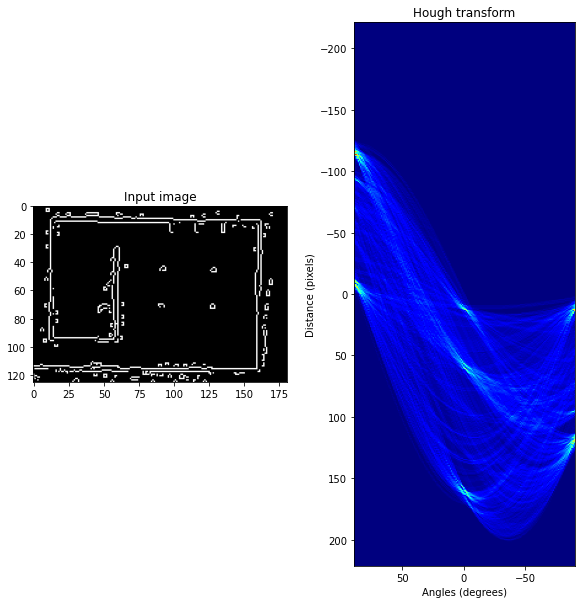

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import LineModelND, ransac
import math
import cv2

rng = np.random.default_rng()

# generate coordinates of line
x = np.arange(-200, 200)
y = 0.5*x 
data = np.column_stack([x, y])

img = cv2.imread('noisyMap.pgm')
drawing = np.zeros(img.shape[:], dtype=np.uint8)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 200)

accumulator, thetas, rhos = hough_line(edges)
show_hough_line(edges, accumulator, thetas, rhos)

In [6]:
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 0.5, np.pi / 180, threshold=30, minLineLength=5, maxLineGap=10)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
cv2.imshow("Result Image", img)
cv2.waitKey()

-1